# Build basic 2-Layer MLP to solve the xor-Problem

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio
import torch

In [127]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [128]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

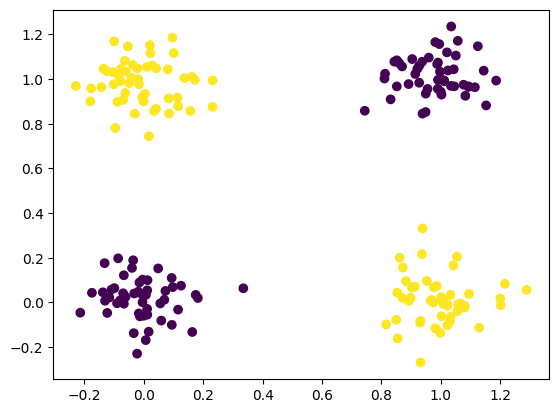

In [129]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [130]:
# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)



In [131]:
# MLP class

import torch
class Perceptron(torch.nn.Module):
  def __init__(self, num_percep):
    super(Perceptron, self).__init__()
    self.fc1 = torch.nn.Linear(2, num_percep, bias=False)
    self.fc2 = torch.nn.Linear(num_percep, 1, bias=False)
    self.non_linear = torch.nn.Sigmoid()


  def forward(self, x):
    output = self.fc1(x)
    output = self.non_linear(output)
    output = self.fc2(output)
    output = self.non_linear(output)
    return output

In [132]:
#get instance of perceptron model
model = Perceptron(3)

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [133]:
#run test data theogh untrained model
model.eval() #set to eval mode
model(X_test)

tensor([[0.5143],
        [0.5144],
        [0.5147],
        [0.5162],
        [0.5050],
        [0.5037],
        [0.5063],
        [0.5031],
        [0.5063],
        [0.5140],
        [0.5136],
        [0.5131],
        [0.5073],
        [0.5056],
        [0.5169],
        [0.5158],
        [0.5191],
        [0.5051],
        [0.5178],
        [0.5069]], grad_fn=<SigmoidBackward0>)

In [134]:
# Train

epoch = 100000
for epoch in range(epoch):
  optimizer.zero_grad()
  #froward
  y_pred = model(X_train)

  # compute loss
  loss = criterion(y_pred.squeeze(), y_train)
  #print(f'epoch: {epoch}, loss: {loss.item()}')

  loss.backward()
  optimizer.step()



In [135]:
model.eval() #set model to eval mode

#train
y_pred = model(X_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
train_acc =torch.sum(y_pred == y_train.int())/ y_train.shape[0]
print("train ACC: ",train_acc.float())

train ACC:  tensor(0.6222)


In [136]:
#test
y_pred = model(X_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int()) / y_test.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(0.5000)


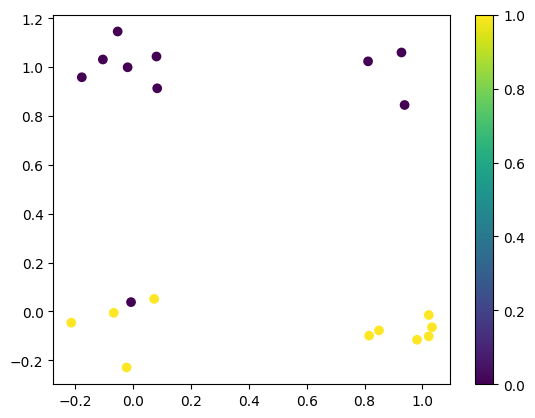

In [137]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.colorbar()